In [1]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [2]:
# Save path to the data set as a variable.
diabetes_file = Path("diabetes_prediction_dataset.csv")

# Read Data
diabetes_df = pd.read_csv(diabetes_file)
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Add info for obesity based on BMI (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
diabetes_df["bmi_category"]=np.select(
    [
        diabetes_df["bmi"].between(0,18.50),
        diabetes_df["bmi"].between(18.51, 24.99),
        diabetes_df["bmi"].between(25.00, 29.99),
        diabetes_df["bmi"].between(30.00, 1000.00)
    ],
    [
        "Underweight",
        "Healthy Weight",
        "Overweight",
        "Obesity"
    ]
)
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Healthy Weight
4,Male,76.0,1,1,current,20.14,4.8,155,0,Healthy Weight


In [4]:
# Age adjusted data age>=30
age_diabetes_df = diabetes_df.loc[diabetes_df["age"]>=30,:]
age_diabetes_df["age"].min()

30.0

In [5]:
# Check data types
age_diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
bmi_category            object
dtype: object

In [6]:
# Check bmi_category counts (for issues with bmi data)
age_diabetes_df["bmi_category"].value_counts()

Overweight        34367
Obesity           20054
Healthy Weight    12458
Underweight         686
Name: bmi_category, dtype: int64

In [7]:
# Generate Data for Box Plot of BMI vs Gender for Diabetics vs non Diabetics
x=[0, 1]
y=["Female", "Male"]

plot_data=[]

for diabetes in x:
    for gender in y:
        z_df = age_diabetes_df.loc[(age_diabetes_df["diabetes"]==diabetes) & (age_diabetes_df["gender"]==gender),:]
        plot_data.append(z_df["bmi"])
    

In [8]:
#STATISTICAL TEST: GENDER vs. DIABETES
#Ho: Gender has no impact on Diabetes diagnosis
#Ha: Gender has an impact on Diabetes diagnosis

#Chi Square Test for Gender and Diabetes
clean_age_diabetes_df = age_diabetes_df.loc[age_diabetes_df["gender"]!="Other",:]
crosstab=pd.crosstab(clean_age_diabetes_df["gender"], clean_age_diabetes_df["diabetes"])
chi_result=st.chi2_contingency(crosstab)
if chi_result[1]<=0.05:
    c_result=f"Chi Square p-value: {round(chi_result[1], 2)}.  Reject Ho, Gender has an impact on Diabetes diagnosis"
else:
    c_result=f"Chi Square p-value: {round(chi_result[1], 2)}.  Fail to reject Ho, Gender has no impact on Diabetes diagnosis"

print(crosstab)
print(chi_result)
print(c_result)

diabetes      0     1
gender               
Female    35924  4303
Male      23408  3923
Chi2ContingencyResult(statistic=203.17062549159746, pvalue=4.245774608178878e-46, dof=1, expected_freq=array([[35328.87835638,  4898.12164362],
       [24003.12164362,  3327.87835638]]))
Chi Square p-value: 0.0.  Reject Ho, Gender has an impact on Diabetes diagnosis


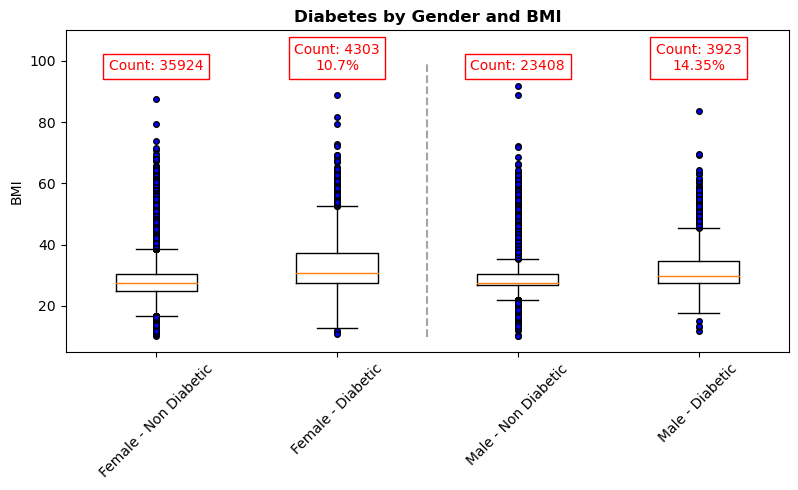

In [9]:
# Create box plot of Gender/Diabetes vs. BMI
x_labels=["Female - Non Diabetic", "Female - Diabetic", "Male - Non Diabetic", "Male - Diabetic" ]
f_nd_c = len(plot_data[0])
f_d_c = len(plot_data[2])
m_nd_c = len(plot_data[1])
m_d_c = len(plot_data[3])

f_d_pct = round((f_d_c / (f_d_c + f_nd_c))*100,2)
m_d_pct = round((m_d_c / (m_d_c + m_nd_c))*100,2)

f_nd=plot_data[0]
f_d=plot_data[2]
m_nd=plot_data[1]
m_d=plot_data[3]


data=[f_nd, f_d, m_nd, m_d]
xticks=np.arange(1, len(x_labels)+1,1)
plt.figure(figsize=(8,5))
plt.boxplot(data, flierprops=dict(markerfacecolor='b', markersize=4))
plt.title("Diabetes by Gender and BMI", weight="bold", fontsize=12)
plt.ylabel("BMI")
plt.xticks(xticks, x_labels, rotation=45)
plt.tight_layout()
plt.ylim(5,110)
plt.vlines(x = 2.5, ymin=10, ymax=100, color="tab:grey", alpha=0.7, linestyles="dashed")
plt.annotate(f"Count: {(f_nd_c)}", (1,97), fontsize=10, color="red", ha="center", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Count: {(f_d_c)}\n{f_d_pct}%", (2,97), fontsize=10, color="red", ha="center", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Count: {(m_nd_c)}", (3,97), fontsize=10, color="red", ha="center", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Count: {(m_d_c)}\n{m_d_pct}%", (4,97), fontsize=10, color="red", ha="center", bbox=dict(facecolor='none', edgecolor='red'))
plt.savefig("bmi_gender.png")
plt.show()

In [10]:
#STATISTICAL TESTS:
#Ho: Gender and BMI have no impact on Diabetes diagnosis
#Ha: Gender and BMI have an impact on Diabetes diagnosis

# t-Test for Female BMI and Diabetes
noD_F_avg_bmi = plot_data[0].mean()
D_F_avg_bmi = plot_data[2].mean()
ttest_f=st.ttest_ind(plot_data[0], plot_data[2], equal_var=False)

f_result=f"\nFEMALE Population:\nAverage BMI No Diabetes = {round(noD_F_avg_bmi,2)}\nAverage BMI Diabetes = {round(D_F_avg_bmi,2)}"
if ttest_f[1] <=0.05:
    f_result1=f"\nt-test p-value: {ttest_f[1]}.  Reject Ho, there is a significant difference"
else:
    f_result1=f"\nt-test p-value: {ttest_f[1]}.  Fail to reject Ho, there is no significant difference"
print(f_result)
print(f_result1)

# t-Test for Male BMI and Diabetes
noD_M_avg_bmi = plot_data[1].mean()
D_M_avg_bmi = plot_data[3].mean()
ttest_m=st.ttest_ind(plot_data[1], plot_data[3], equal_var=False)

m_result=f"\nMALE Population:\nAverage BMI No Diabetes = {round(noD_M_avg_bmi,2)}\nAverage BMI Diabetes = {round(D_M_avg_bmi,2)}"
if ttest_m[1] <=0.05:
    m_result1=f"\nt-test p-value: {ttest_m[1]}.  Reject Ho, there is a significant difference"
else:
    m_result1=f"\nt-test p-value: {ttest_f[1]}.  Fail to reject Ho, there is no significant difference"
print(m_result)
print(m_result1)

#ANOVA to Compare all 4 Populations:
anova=st.f_oneway(plot_data[0], plot_data[2], plot_data[1], plot_data[3])
if anova[1] <=0.05:
    anova_result=f"Anova p-value: {anova[1]}.  Reject Ho, there is a significant difference"
else:
    anova_result=f"Anova p-value: {anova[1]}.  Fail to reject Ho, there is no significant difference"
    
print(f"\n{anova_result}")


FEMALE Population:
Average BMI No Diabetes = 28.42
Average BMI Diabetes = 32.79

t-test p-value: 1.0289537252839689e-225.  Reject Ho, there is a significant difference

MALE Population:
Average BMI No Diabetes = 28.76
Average BMI Diabetes = 31.43

t-test p-value: 3.2006611959813114e-122.  Reject Ho, there is a significant difference

Anova p-value: 0.0.  Reject Ho, there is a significant difference


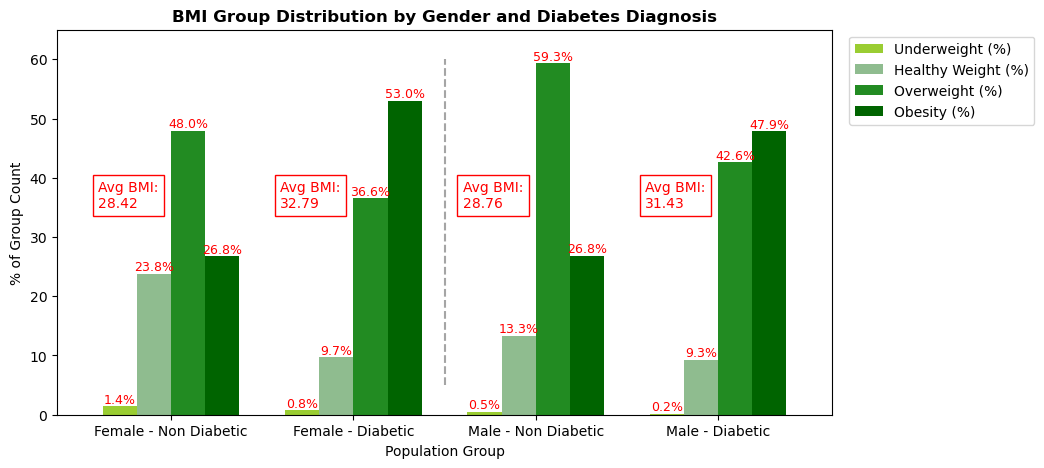

bmi_category,Underweight (%),Healthy Weight (%),Overweight (%),Obesity (%)
group,,,,
Female - Non Diabetic,1.45,23.81,47.97,26.76
Female - Diabetic,0.79,9.67,36.56,52.99
Male - Non Diabetic,0.53,13.34,59.32,26.82
Male - Diabetic,0.18,9.28,42.65,47.90


In [26]:
# Bar Graph of bmi_category by gender

#summarize data to a few columns and do a groupby unstacking the results into a dataframe
diabetes_g_df = age_diabetes_df.loc[age_diabetes_df["gender"]!="Other", ["gender", "diabetes", "bmi_category", "bmi"]]
bar_df=diabetes_g_df.groupby(["gender", "diabetes", "bmi_category"]).count().squeeze().unstack()
bar_df = bar_df.reset_index()

#rename diabetes and concatenate for plotting
bar_df["diabetes"] = bar_df["diabetes"].map({0:"Non Diabetic", 1:"Diabetic"})
bar_df["group"] = bar_df["gender"] + " - " + bar_df["diabetes"]
bar_df = bar_df[["group", "Underweight", "Healthy Weight", "Overweight", "Obesity"]]
bar_df = bar_df.set_index("group", drop=True)

#convert counts to percent of population (for comparison across populatins)
bar_df["tot_pop"]= bar_df["Underweight"]+bar_df["Healthy Weight"]+bar_df["Overweight"]+bar_df["Obesity"]
bar_df["Underweight (%)"]=round(bar_df["Underweight"]/bar_df["tot_pop"]*100,2)
bar_df["Healthy Weight (%)"]=round(bar_df["Healthy Weight"]/bar_df["tot_pop"]*100,2)
bar_df["Overweight (%)"]=round(bar_df["Overweight"]/bar_df["tot_pop"]*100,2)
bar_df["Obesity (%)"]=round(bar_df["Obesity"]/bar_df["tot_pop"]*100,2)
bar_df = bar_df[["Underweight (%)", "Healthy Weight (%)", "Overweight (%)", "Obesity (%)"]]

colors=["yellowgreen", "darkseagreen", "forestgreen", "darkgreen"]
ax = bar_df.plot(kind="bar", color=colors, figsize=(10, 5), rot=0, width=0.75)
plt.xlabel("Population Group", fontsize=10)
plt.ylabel("% of Group Count", fontsize=10)
plt.ylim(0,65)

for container in ax.containers:
    ax.bar_label(container, fmt="{:.1f}%", fontsize=9, color="red")
ax.legend(bbox_to_anchor=(1.27, 1), loc="upper right")
plt.title("BMI Group Distribution by Gender and Diabetes Diagnosis", weight="bold", fontsize=12)
plt.vlines(x = 1.5, ymin=5, ymax=60, color="tab:grey", alpha=0.7, linestyles="dashed")
plt.annotate(f"Avg BMI:\n{round(noD_F_avg_bmi,2)}",(-.4,35), fontsize=10, color="red", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Avg BMI:\n{round(D_F_avg_bmi,2)}",(0.6,35), fontsize=10, color="red", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Avg BMI:\n{round(noD_M_avg_bmi,2)}",(1.6,35), fontsize=10, color="red", bbox=dict(facecolor='none', edgecolor='red'))
plt.annotate(f"Avg BMI:\n{round(D_M_avg_bmi,2)}",(2.6,35), fontsize=10, color="red", bbox=dict(facecolor='none', edgecolor='red'))
plt.savefig("bmi_category_gender.png")
plt.show()

bar_df

In [12]:
#Correlations: BMI vs. Diabetes by Gender

male = age_diabetes_df.loc[(age_diabetes_df["gender"]=="Male"),:]
female = age_diabetes_df.loc[(age_diabetes_df["gender"]=="Female"),:]

dia_m=male.iloc[:,8]
bmi_m=male.iloc[:,5]
correlation1=st.pointbiserialr(dia_m,bmi_m)
print(f"Male correlation between BMI and Diabetes is {round(correlation1[0],2)}")

dia_f=female.iloc[:,8]
bmi_f=female.iloc[:,5]
correlation2=st.pointbiserialr(dia_f,bmi_f)
print(f"Female correlation between BMI and Diabetes is {round(correlation2[0],2)}")

Male correlation between BMI and Diabetes is 0.18
Female correlation between BMI and Diabetes is 0.21
